# Jack's Car Rental Problem
We implement policy iteration for the simple and advanced version of this and display the evolution of policies through the iteration along with a plot of the final value function.

## Simple Situation
As described in the text of the book, we want to just replicate results by recreating the diagrams.

In [38]:
from car_rental_simple import CarRentalSimpleSolver
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
# Constants describing the parameters of the problem
RENT_MULTIPLIER = 10
MOVE_COST = 2
LAMBDA_LOC1_REQUESTS = 3
LAMBDA_LOC2_REQUESTS = 4
LAMBDA_LOC1_RETURNS = 3
LAMBDA_LOC2_RETURNS = 2
MAX_CAR_AT_LOC = 20
MAX_CAR_MOVED = 5
GAMMA = 0.9

TOL = 1e-3

In [46]:
car_rental_solver = CarRentalSimpleSolver(
    rent_multiplier=RENT_MULTIPLIER,
    move_cost=MOVE_COST,
    lambda_loc1_requests=LAMBDA_LOC1_REQUESTS,
    lambda_loc2_requests=LAMBDA_LOC2_REQUESTS,
    lambda_loc1_returns=LAMBDA_LOC1_RETURNS,
    lambda_loc2_returns=LAMBDA_LOC2_RETURNS,
    max_car_at_loc=MAX_CAR_AT_LOC,
    max_car_moved=MAX_CAR_MOVED,
    gamma=GAMMA,
    tol=TOL,
)

In [47]:
policies, value_fn = car_rental_solver.solve(num_iter=100)

KeyboardInterrupt: 

In [31]:
# testing for TruncatedPoisson
from truncated_poisson import TruncatedPoisson
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
poisson = TruncatedPoisson(3, 20)

In [21]:
poisson.expectation(0)

np.float64(0.0)

In [24]:
poisson.pmf(20, 3)

np.float64(0.22404180765538775)

In [30]:
poisson.expectation(6)

np.float64(2.949297385759137)

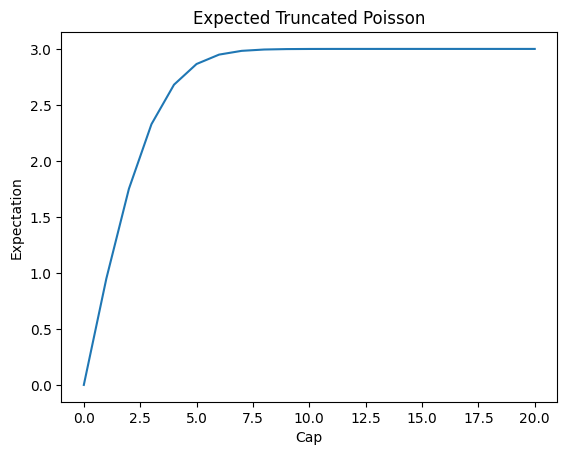

In [32]:
x = np.arange(start=0, stop=21, step=1)
plt.title(f"Expected Truncated Poisson")
plt.xlabel(f"Cap")
plt.ylabel(f"Expectation")
plt.plot(x, poisson.expectation(x))